In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

# Import data and calculate spending per capita

In [108]:
data = pd.read_csv('dataset.csv')

In [109]:
data.transit_spending = data.transit_spending.apply(lambda i: int(i[1:-3].replace(',', '')))

In [110]:
data.head()

,area,census_division,city,city_type,population,transit_spending
0,16.9/km2,Hastings,Bancroft,Town,3880,71249
1,"1,428.0/km2",Simcoe,Barrie,City,136063,22017099
2,25.5/km2,Muskoka,Bracebridge,Town,15414,126394
3,"2,228.7/km2",Peel,Brampton,City,523906,166780412
4,"1,345.9/km2",Brant,Brantford,City,93650,12002944


In [111]:
data['spending_per_capita'] = data.population / data.transit_spending

In [112]:
data.head()

,area,census_division,city,city_type,population,transit_spending,spending_per_capita
0,16.9/km2,Hastings,Bancroft,Town,3880,71249,0.054457
1,"1,428.0/km2",Simcoe,Barrie,City,136063,22017099,0.006180
2,25.5/km2,Muskoka,Bracebridge,Town,15414,126394,0.121952
3,"2,228.7/km2",Peel,Brampton,City,523906,166780412,0.003141
4,"1,345.9/km2",Brant,Brantford,City,93650,12002944,0.007802


# Plot data with Seaborn

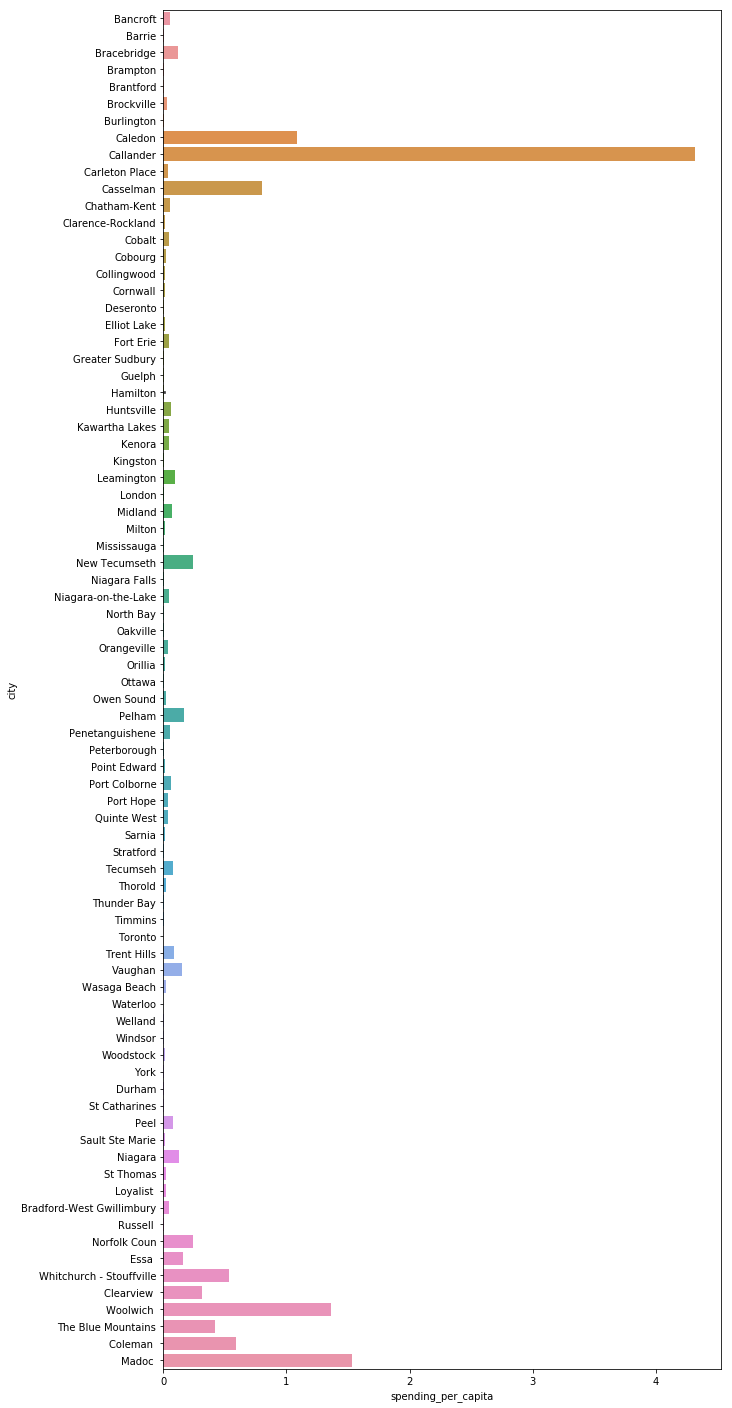

In [113]:
plt.figure(figsize=(10,25))
sns.barplot(y='city', x='spending_per_capita', data=data)

# Plot data with Plotly.py

In [114]:
import plotly.plotly as py
import plotly.graph_objs as go

In [115]:
cities = list(data.city)
data.spending_per_capita = data.spending_per_capita.apply(lambda i: '${:,.2f}'.format(round(i, 2)))
spending_per_capita = list(data.spending_per_capita)
cities, spending_per_capita = (list(t) for t in zip(*sorted(zip(cities, spending_per_capita),reverse=True)))
print(spending_per_capita)

['$0.00', '$1.37', '$0.01', '$0.01', '$0.53', '$0.01', '$0.00', '$0.02', '$0.15', '$0.08', '$0.00', '$0.01', '$0.01', '$0.02', '$0.42', '$0.08', '$0.01', '$0.03', '$0.01', '$0.01', '$0.01', '$0.01', '$0.04', '$0.03', '$0.06', '$0.01', '$0.01', '$0.06', '$0.17', '$0.08', '$0.02', '$0.00', '$0.01', '$0.03', '$0.01', '$0.01', '$0.24', '$0.05', '$0.00', '$0.13', '$0.24', '$0.00', '$0.02', '$0.07', '$1.53', '$0.02', '$0.01', '$0.09', '$0.01', '$0.04', '$0.05', '$0.06', '$0.00', '$0.00', '$0.00', '$0.01', '$0.05', '$0.16', '$0.02', '$0.01', '$0.01', '$0.01', '$0.01', '$0.59', '$0.02', '$0.05', '$0.31', '$0.01', '$0.06', '$0.80', '$0.04', '$4.32', '$1.08', '$0.01', '$0.03', '$0.01', '$0.00', '$0.05', '$0.12', '$0.01', '$0.05']


In [116]:
data = [go.Bar(
            x=spending_per_capita,
            y=cities,
            orientation = 'h',
            marker=dict(
                color='rgba(50, 171, 96, 0.6)',
                line=dict(
                    color='rgba(50, 171, 96, 1.0)',
                    width=1),),
            name='Ontario transit spending per capita'
    
    )]
layout = go.Layout(
    title='Ontario Municipal per Capita Transit Spending',
    xaxis=dict(
        title='Per Capita Spending ($/person)'
    ),
    autosize=False,
    width=590,
    height=1500,
    margin=go.Margin(
        l=200
    ),
    paper_bgcolor='rgb(226, 224, 222)',
    plot_bgcolor='rgb(226, 224, 222)'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')